# Logistic Regression 

In the assignment, you will use gradient ascent to find the weights for the logistic regression.   

As an example, we will use the widely-used breast cancer data set.  This data set is described here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin


## Step 1:  Getting, preprocessing, and understanding the dataset

### Importing the standard libraries

In [1343]:
# Importing important libraries
# Import breastcancer dataset
# Import preprocessing from sklearn
# Import train_test_split from sklearn
# Import numpy,math
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.linear_model
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

### Importing the dataset

In [1344]:
# Load dataset to a python variable cancer
# Store target to a variable called y
# Store feature to a variable called X
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [1345]:
# Printing the shape of data (X) and target (Y) values 
print(X.shape)
print(y.shape)

(569, 30)
(569,)


### Data Pre-Processing
#### Splitting the data into train and test before scaling the dataset


In [1346]:
# Use train_test_split() function to split the dataset
# Store the return value of pervious step to X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y)



#### Scale the data since we will be using gradient ascent

In [1347]:
# Find the scaler of the dataset by using preprocessing.StandardScaler().fit()
# Using this scale to scale the X_train and X_test using .transform()
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [1348]:
# TODO - Print the shape of x_train and y_train 
print(X_train.shape) # It should print (426, 30)
print(y_train.shape) # It should print (426,)

(426, 30)
(426,)


#### Adding a column of ones to the  matrices $X_{train}$ and  $X_{test}$
After adding a column of ones $X_{train}=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$

Similarly for $X_{test}$

In [1349]:
# Create a column vector of ones by using np.ones and reshape
# Append a column of ones to x_train 
# Append a column of ones in the beginning of x_train by using np.hstack

bias_column_train = np.ones((X_train.shape[0],1))
X_train = np.c_[bias_column, X_train]

# Now do the same for the test data
bias_column_test = np.ones((X_test.shape[0],1))
X_test = np.c_[bias_column_test, X_test]

# We can check that everything worked correctly by:
# Printing out the new dimensions
print("The training data has dimensions: ", X_train.shape, ". The testing data has dimensions: ",X_test.shape)
# # Looking at the first two rows of X_train to check everything worked as expected
print(X_train[0:2])

The training data has dimensions:  (426, 31) . The testing data has dimensions:  (143, 31)
[[ 1.         -0.16007677 -0.05964709 -0.1460542  -0.26472754  0.64835642
   0.18284302 -0.05093895  0.11922546 -0.03663265 -0.30765877 -0.72430557
   0.25666174 -0.70507096 -0.47891641 -0.53359872 -0.35183811  0.02718785
   0.27918718 -0.89241677 -0.55188077 -0.28462516  0.29043696 -0.2791337
  -0.34797404  0.43850818  0.0072735   0.32014789  0.46319471 -0.38688627
  -0.41772679]
 [ 1.         -0.86474728 -0.97165888 -0.86762572 -0.80369536 -1.20233235
  -0.66326766 -0.69239882 -0.74847364  0.69866639 -0.07442638 -0.92268026
  -0.30686428 -0.8322082  -0.66772095 -0.58233308 -0.38310943 -0.55336123
  -0.81719919 -0.20154802 -0.76946957 -0.85193639 -0.74056029 -0.807946
  -0.75964556 -1.02872269 -0.3786701  -0.58020416 -0.72828815  0.50114099
  -0.64701182]]


### Understanding the dataset

In [1350]:
# Printing the names of all the features
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [1351]:
# You can add your own code here to better understand the dataset
# The data set has a key called DESCR which gives us an overview of the dataset and its features.
#   we can simply call the key and get a good understanding of the dataset.
cancer.DESCR


'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,


 Before writing the gradient ascent code, first write some helpful functions


 
### Sigmoid($z$)
The first function you will write is sigmoid($z$)

sigmoid($z$) takes as input a column vector of real numbers, $z^T = [z_1, z_2, ..., z_{N'}]$, where $N'$ is the number of  examples

It should produce as output a column vector $\left[\frac{1}{1+e^{-z_1}},\frac{1}{1+e^{-z_2}},...,\frac{1}{1+e^{-z_{N'}}}\right]^T$

In [1352]:
# Write the sigmoid function
def sigmoid(z):
    output =(1 / (1+np.exp(-z))) 
    return output


### Initializing ${\bf w}$
For testing the next functions, we create a coefficient vector, ${\bf w}$.
We will initialize the coeffients to be $0$, i.e. ${\bf w}^T = [0,0,\ldots ,0]$ (We could have initialized ${\bf w}$ to any values.)

In [1353]:
# Initialize w using np.zeros()
w = np.zeros((X_train.shape[1],1))
print(w)


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### Our hypothesis, $h({\bf x})$
The next  function to write is our hypothesis function. 

For example if our design matrix $X$ consists of single example $X=[1,x_1,x_2,\ldots,x_d]$ and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, it returns $h({\bf x})=\frac{1}{1+e^{-\left({w_{0}\cdot 1 +w_1\cdot x_1+\cdots w_d\cdot x_d}\right)}}$

If given a  matrix consisting of $N'$ examples 
$X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, the function returns a column vector
$[h({\bf x}^{(1)}),h({\bf x}^{(2)},\ldots, h({\bf x}^{(N')}]^T$

In [1354]:
# Predict the probability that a patient has cancer 
# Write the hypothesis function 
def hypothesis(X , w):
    output = sigmoid(X.dot(w))
    return output



# Log-Likelihood Function.
Write the code to calculate the log likelihood function $\ell({\bf w})=
\sum_{i=1}^{N'}y^{(i)}\ln(h({\bf x}^{(i)})) +(1- y^{(i)})\ln(1-h({\bf x}^{(i)}))$

The input is a matrix consisting of $N'$ examples $X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and a column vector ${\bf y}^T=[y^{(1)},y^{(2)},\dots,y^{(N')}]$ of labels for $X$.

The output is $\ell({\bf w})$

In [1355]:
# Write the log likelihood function 
def log_likelihood(X , y , w ):
    pred_values = hypothesis(X,w)
    m_1 = y*np.log(pred_values)
    m_2 = 1-y
    m_2 = (m_2)*np.log(1-pred_values)
    output = np.sum(m_1+m_2)
    return output


#log_likelihood(X_train , y_train , w )

# Gradient Ascent
Now write the code to perform gradient ascent.  You will use the update rule from the lecture notes.

In [1356]:
# TODO - Write the gradient ascent function 
def Logistic_Regresion_Gradient_Ascent(X, y, learning_rate, num_iters):
    # For every 100 iterations, store the log_likelihood for the current w
    # Initializing log_likelihood to be an empty list  
    log_likelihood_values = []
    # Initialize w to be a zero vector of shape x_train.shape[1],1
    w = np.zeros((X.shape[1],1))
    # Initialize N to the number of training examples
    n = X.shape[0]
    
    for i in range(num_iters):
        pred_values = hypothesis(X,w)
        gradient= np.dot(X.T, (pred_values - y)) 
        w = w - learning_rate*(1/n)*gradient
        if (i%100==0):
            log_likelihood_values.append(log_likelihood(X,y, w))
            # update the w using formula 
            
    return w, log_likelihood_values 



### After completing the code above, run the following

In [1357]:
# Set the learning_rate
learning_rate = 0.5
# Set the num_iters
num_iters = 5000
# Run the Logistic_Regresion_Gradient_Ascent() and store the returned values
w, log_likelihood_values= Logistic_Regresion_Gradient_Ascent(X_train, y_train.reshape(y_train.shape[0],1), 0.5, 5000)
print(w)
print(log_likelihood_values)

[[-0.2286852 ]
 [ 0.14173602]
 [-0.28733452]
 [-0.0423142 ]
 [-0.3107993 ]
 [ 0.36042429]
 [ 2.30497808]
 [-1.72114613]
 [-1.84572172]
 [ 0.83546237]
 [-0.52596631]
 [-2.99995504]
 [ 0.79589595]
 [-2.03129351]
 [-2.3316597 ]
 [-0.84643462]
 [ 2.40832011]
 [ 0.96083314]
 [-1.60666361]
 [ 0.8479361 ]
 [ 0.87838155]
 [-1.30585183]
 [-2.41640251]
 [-1.17954109]
 [-1.71611221]
 [-0.28182275]
 [ 0.6703662 ]
 [-2.39218311]
 [-2.08097004]
 [-2.03984758]
 [-1.23865558]]
[-97.32936809036504, -26.712852328348852, -23.42927707367933, -21.914244001022286, -20.969092764568558, -20.29288177752633, -19.76973974661386, -19.34366568431775, -18.983431357968534, -18.670102706294085, -18.391622302395035, -18.140021485540633, -17.909846557297104, -17.69723631453703, -17.499368775927266, -17.314121031433384, -17.13985424422321, -16.975273851305516, -16.819336158543518, -16.67118434196537, -16.530103575528127, -16.395488901722214, -16.26682178208344, -16.143652681804415, -16.02558792857809, -15.91227965184883

# Plotting Likelihood v/s Number of Iterations.

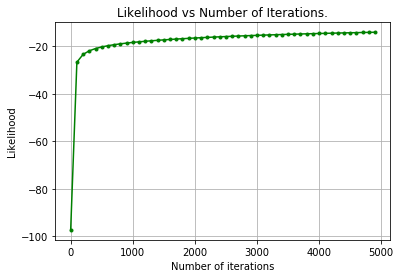

In [1358]:
# Run this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(0,5000,100))
plt.plot(iters,log_likelihood_values,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()

#  Evaluating your model

In [1359]:
# use hypothesis(...) to predict.
test_set_predictions = hypothesis(X_test , w)
print(test_set_predictions)

[[5.82838333e-01]
 [9.99954896e-01]
 [2.30673918e-21]
 [9.99999989e-01]
 [9.99999918e-01]
 [9.99879555e-01]
 [9.99933533e-01]
 [9.99998800e-01]
 [1.82375550e-09]
 [9.99984004e-01]
 [9.33084191e-01]
 [9.99997561e-01]
 [9.95855871e-01]
 [6.99209279e-15]
 [9.99753498e-01]
 [6.78109156e-01]
 [9.99985019e-01]
 [4.17201826e-16]
 [1.07604592e-01]
 [9.99979231e-01]
 [1.32341182e-06]
 [9.99993430e-01]
 [1.03116337e-02]
 [9.98797084e-01]
 [7.38784335e-14]
 [9.99923898e-01]
 [9.89795805e-01]
 [5.17332446e-25]
 [2.58280338e-01]
 [9.99979736e-01]
 [3.64852815e-17]
 [1.09875633e-14]
 [9.84458513e-01]
 [1.13743472e-06]
 [9.99990537e-01]
 [5.64936718e-08]
 [5.74358841e-04]
 [9.99999977e-01]
 [9.77114641e-01]
 [9.99973331e-01]
 [9.99974616e-01]
 [9.99994272e-01]
 [8.83566142e-01]
 [9.99024776e-01]
 [9.98134729e-01]
 [1.92251609e-17]
 [1.27107097e-16]
 [1.78349288e-05]
 [9.99999970e-01]
 [3.29741375e-02]
 [3.04539480e-06]
 [4.44175351e-15]
 [9.99999670e-01]
 [4.76286860e-06]
 [9.99987150e-01]
 [6.882833

In [1360]:
#converting predictions to 0's and 1's so that performance can be evaluated
def Evaluate_Model(predictions,y_values):
    predictions[predictions > 0.5] = 1
    predictions[predictions < 0.5] = 0

    TP=0
    FP=0
    FN=0
    TN=0

    # count TP,FP,FN,FP

    for i in range(y_test.shape[0]):
        if (y_values[i] == 0 and predictions [i] == 0):
            TN+=1
        elif (y_values[i] == 1 and predictions[i] == 1):
            TP+=1
        elif (y_values[i] == 1 and predictions[i] == 0):
            FN+=1
        elif (y_values[i] == 0 and predictions[i] == 1):
            FP+=1

    # calculate precision, recall and f1
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1 = (2* (precision*recall))/(precision+recall)
    total = precision+recall+f1

    print("Precision: ",precision)
    print("Recall: ",recall)
    print("F1: ",f1)
    print("Confusion Matrix: ")
    print("TP: ",TP," FN: ",FN," FP: ",FP," TN: ",TN)
    
    return total
    
Evaluate_Model(test_set_predictions, y_test)

Precision:  0.946236559139785
Recall:  0.9887640449438202
F1:  0.967032967032967
Confusion Matrix: 
TP:  88  FN:  1  FP:  5  TN:  49


2.902033571116572

In [1361]:
#hyper-parameter tuning for learning rate  
learning_rate_trial_list = [0.5, 1,1.5,2,2.5,3,3.5]

for i in learning_rate_trial_list:
    w, log_likelihood_values= Logistic_Regresion_Gradient_Ascent(X_train, y_train.reshape(y_train.shape[0],1), i, 5000)
    test_set_predictions = hypothesis(X_test , w)
    print("-"*20 +  "Learning Rate = "+ str(i) + "-"*20)
    Evaluate_Model(test_set_predictions, y_test)



--------------------Learning Rate = 0.5--------------------
Precision:  0.946236559139785
Recall:  0.9887640449438202
F1:  0.967032967032967
Confusion Matrix: 
TP:  88  FN:  1  FP:  5  TN:  49
--------------------Learning Rate = 1--------------------
Precision:  0.9456521739130435
Recall:  0.9775280898876404
F1:  0.9613259668508287
Confusion Matrix: 
TP:  87  FN:  2  FP:  5  TN:  49


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


--------------------Learning Rate = 1.5--------------------
Precision:  0.9560439560439561
Recall:  0.9775280898876404
F1:  0.9666666666666667
Confusion Matrix: 
TP:  87  FN:  2  FP:  4  TN:  50
--------------------Learning Rate = 2--------------------
Precision:  0.9555555555555556
Recall:  0.9662921348314607
F1:  0.9608938547486034
Confusion Matrix: 
TP:  86  FN:  3  FP:  4  TN:  50
--------------------Learning Rate = 2.5--------------------
Precision:  0.9555555555555556
Recall:  0.9662921348314607
F1:  0.9608938547486034
Confusion Matrix: 
TP:  86  FN:  3  FP:  4  TN:  50
--------------------Learning Rate = 3--------------------
Precision:  0.9555555555555556
Recall:  0.9662921348314607
F1:  0.9608938547486034
Confusion Matrix: 
TP:  86  FN:  3  FP:  4  TN:  50
--------------------Learning Rate = 3.5--------------------
Precision:  0.9555555555555556
Recall:  0.9662921348314607
F1:  0.9608938547486034
Confusion Matrix: 
TP:  86  FN:  3  FP:  4  TN:  50


In [1362]:
num_its_trial_list = [5000,10000,15000,20000,25000,30000,35000]

for i in num_its_trial_list:
    w, log_likelihood_values= Logistic_Regresion_Gradient_Ascent(X_train, y_train.reshape(y_train.shape[0],1), 0.5, i)
    test_set_predictions = hypothesis(X_test , w)
    print("-"*20 +  "Number of Iterations = "+ str(i) + "-"*20)
    Evaluate_Model(test_set_predictions, y_test)


--------------------Number of Iterations = 5000--------------------
Precision:  0.946236559139785
Recall:  0.9887640449438202
F1:  0.967032967032967
Confusion Matrix: 
TP:  88  FN:  1  FP:  5  TN:  49
--------------------Number of Iterations = 10000--------------------
Precision:  0.9456521739130435
Recall:  0.9775280898876404
F1:  0.9613259668508287
Confusion Matrix: 
TP:  87  FN:  2  FP:  5  TN:  49


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


--------------------Number of Iterations = 15000--------------------
Precision:  0.9560439560439561
Recall:  0.9775280898876404
F1:  0.9666666666666667
Confusion Matrix: 
TP:  87  FN:  2  FP:  4  TN:  50
--------------------Number of Iterations = 20000--------------------
Precision:  0.9555555555555556
Recall:  0.9662921348314607
F1:  0.9608938547486034
Confusion Matrix: 
TP:  86  FN:  3  FP:  4  TN:  50
--------------------Number of Iterations = 25000--------------------
Precision:  0.9555555555555556
Recall:  0.9662921348314607
F1:  0.9608938547486034
Confusion Matrix: 
TP:  86  FN:  3  FP:  4  TN:  50
--------------------Number of Iterations = 30000--------------------
Precision:  0.9555555555555556
Recall:  0.9662921348314607
F1:  0.9608938547486034
Confusion Matrix: 
TP:  86  FN:  3  FP:  4  TN:  50
--------------------Number of Iterations = 35000--------------------
Precision:  0.9555555555555556
Recall:  0.9662921348314607
F1:  0.9608938547486034
Confusion Matrix: 
TP:  86  FN: 

The results I have got seem very interesting. When I increase the learning rate the perfomance metrics start falling 
and the model becomes increasingly more inaccurate. From the above, it seems 0.5 is the best learning rate. This
may be the case that when I increase the learning rate, the gradient ascent jumps past the minimum point whereas
with a smaller learning rate it more closely gets to the mininimum loss function value. 

With regards to the number of iterations. This is actually quite suprising. When I increase the number of iterations
the perfomance metrics start falling and the model becomes increasingly more inaccurate. Usually one expect the 
accuracy to increase, but apparently when the number of iterations is too much overfitting might happen.

Therefore, from the results above and after my tuning the best parameters seem to be Learning Rate=0.5 and number 
of iterations = 5000